<div style= "text-align:center">
    <span style = "font-size:30px;border-bottom:2px solid green"><b>Exploratory Data Analysis(EDA) - Mini Project</b></span><br>
</div>

<div> 
    <span style = "font-size:16px;border-bottom:1.5px dashed">What is Exploratory Data Analysis(EDA) ?</span><br>
</div><br>

EDA is a Preprocessing step That Helps Us to Understand, Clean, and summarize<br>
The Data So We can Analyse The dataset more Effectively<br><br>

##### <span style="border-bottom: 1.5px dashed">Main four steps that we want to perform in Exploratory Data Analysis(EDA)</span><br>

- Handling Missing Values <b>--></b> in this step we identify and manage all <u><b>Null or Missing values</b></u> in the Dataset.<br><br>
- Outlier Detection & Removal <b>--></b> outliers are extreme values that dont fit the normal pattern of the data they can affect the ML model<br>so we need to detect it using <u><b>IQR method</b></u> or using <u><b>BOXPLOT</b></u> and treat them properly<br><br>
- Encoding Categorical Variables <b>--></b> since ML model can't understand Text data we need to convert categorical column to numerical formats using <u><b>LabelEncoding</b></u> or <u><b>OnehotEncoding</b></u><br><br>
- Feature Scaling<b>--></b> in this step We scale the Numerical Features(columns) to bring all values in to a similar range.<br>so the ML model will treats all Features Equally. we can use <u><b>MinMaxScaler</b></u> or <u><b>Standard Scaler</b></u> for scaling the Features  

<span style = " font-size:16px;border-bottom:1px solid green">I will use the <b>VideoGame Sales With Ratings</b> Dataset and apply key EDA steps , Handling missing values, Outlier detection and removal , Encoding and Scaling features to clean and prepare dataset</span>

<hr>

### <span style = "border-bottom:1px dashed"><b>1.</b> Importing Libraries and Loading Dataset</span>

In [1]:
# To hide unwanted warning messages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

# Essential Libraries for EDA
import pandas as pd              # for handling data
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for creating basic charts
import seaborn as sns            # for creating better visualized charts
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # for encoding and scaling

### <span style= "border-bottom:1px solid green">Loading dataset</span>

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/Video_Games_Sales_as_at_22_Dec_2016.csv") # orginal dataset

##### I am making a copy of the original dataset to ensure the original data set remains unchanged all EDA steps will be performed on this copied version


### <span style= "border-bottom:1px solid green">Dataset copied Version</span>

In [3]:
df = data.copy() # copied version

### <span style="border-bottom:1px dashed"><b>2.</b> Understanding the Dataset</span>

in this step i am going to explore the basic structure of the dataset including.<br>
- number of rows and columns
- informations about the dataset
- presence of any missing values
- statistical summary of the dataset 

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.rename(columns = {"Genre":"Game_category","Rating":"Age_Rating"},inplace = True) # renamed for better readebility

In [6]:
#number of rows and columns
print(f"shape of the dataset: {df.shape}\n")

# basic information 
print(df.info())

# checking for missing values
print("\nMissing values in each column")
print(f"{df.isnull().sum()}\n")

# checkig for duplicate values
print(f"Number of Duplicate values = {df.duplicated().sum()}\n")

# statistical summary of numerical columns
df.describe()

shape of the dataset: (16719, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Game_category    16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Age_Rating       9950 non-null   object 
dtypes: float64(9), object(7

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


#### <span style = "border-bottom:1px solid">visualization of missing values</span>

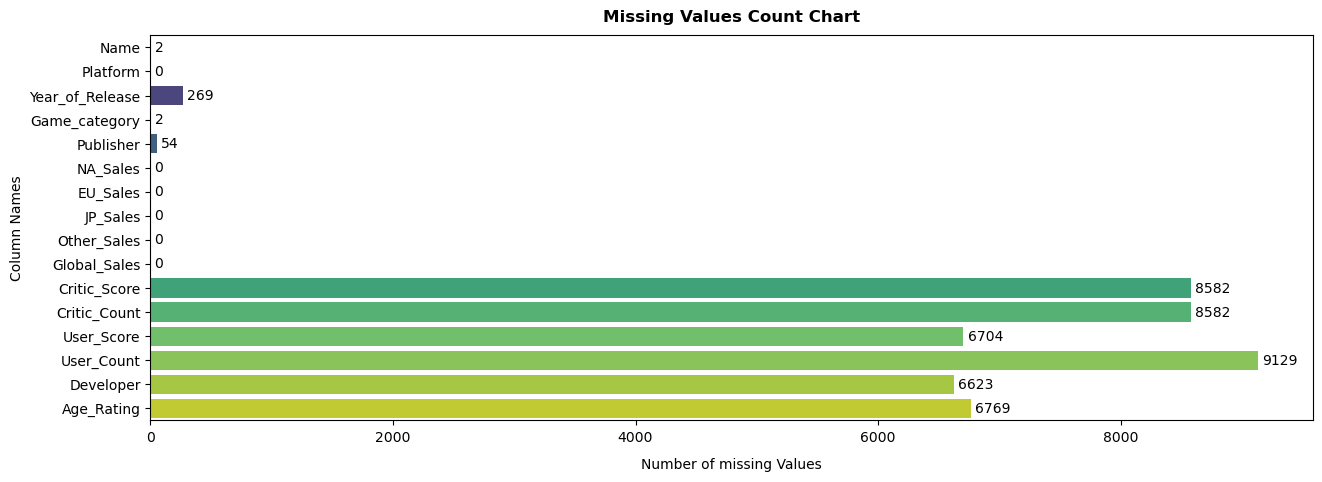

In [7]:
missing = df.isnull().sum()

plt.figure(figsize = (15,5))
ax = sns.barplot(x=missing.values,y=missing.index, palette = "viridis")
plt.title("Missing Values Count Chart",fontweight = "bold",pad=10)
plt.xlabel("Number of missing Values",labelpad = 10)
plt.ylabel("Column Names")

for i in ax.containers:  # this line will loop through actual bars and add the value to the edge using bar_label
    ax.bar_label(i, label_type='edge', padding=3) # label_type will ensure the value will on the edge of the bar

plt.show()

<div style="text-align:center">
    <span style = "border-bottom:1px solid; font-size:20px;">Observation & Conclusion</span>
</div><br>
<span style = "font-size:15px">From my observation the dataset contains <b>10 columns</b> with missing values. <b>Six</b> Categorical columns and <b>Four</b> Numeric columns containing Null values, There is no duplicate rows present in the data set so filling missing values is the best approach instead of dropping them</span><br><br>

<span style = "font-size:19px;border-bottom:1px solid;">Notted Issues</span><br>
<ul>
    <li><b style="border-bottom:1px solid red">Year of Release</b> column is in float format, it should be in Int format logically year doesnt have decimal points</li>
    <li><b style="border-bottom:1px solid red">User Score</b> column is currently in object format , its a numeric column so need to be in Numeric format</li>
</ul>

<span style = "border-bottom:1px solid green;font-size:25px">Handling Null Values & Noted Issues</span><br>
- User Score is a numeric column but is listed as object type. this happens because there is atleast one string value in the column. pandas treat the entier column as object in such case. so we need to identify and replace these values before filling missing values

In [8]:
df["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
df["User_Score"].replace("tbd",np.nan, inplace = True)

In [10]:
df["User_Score"] = pd.to_numeric(df["User_Score"])

In [11]:
df["User_Score"].dtype

dtype('float64')

In [12]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Game_category', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Age_Rating'],
      dtype='object')

- Next ploting histogram for numeric columns to understand their distribution and deside how to treat missing values in each column
- if its equaly distributed i can use mean to fill the value if its not i will use median to fill the values

In [13]:
col1 = ["Name","Game_category","Publisher","Developer","Age_Rating"] # object columns with missing values
col2 = ["Year_of_Release","Critic_Score","Critic_Count","User_Score","User_Count"] # numeric columns with missing values

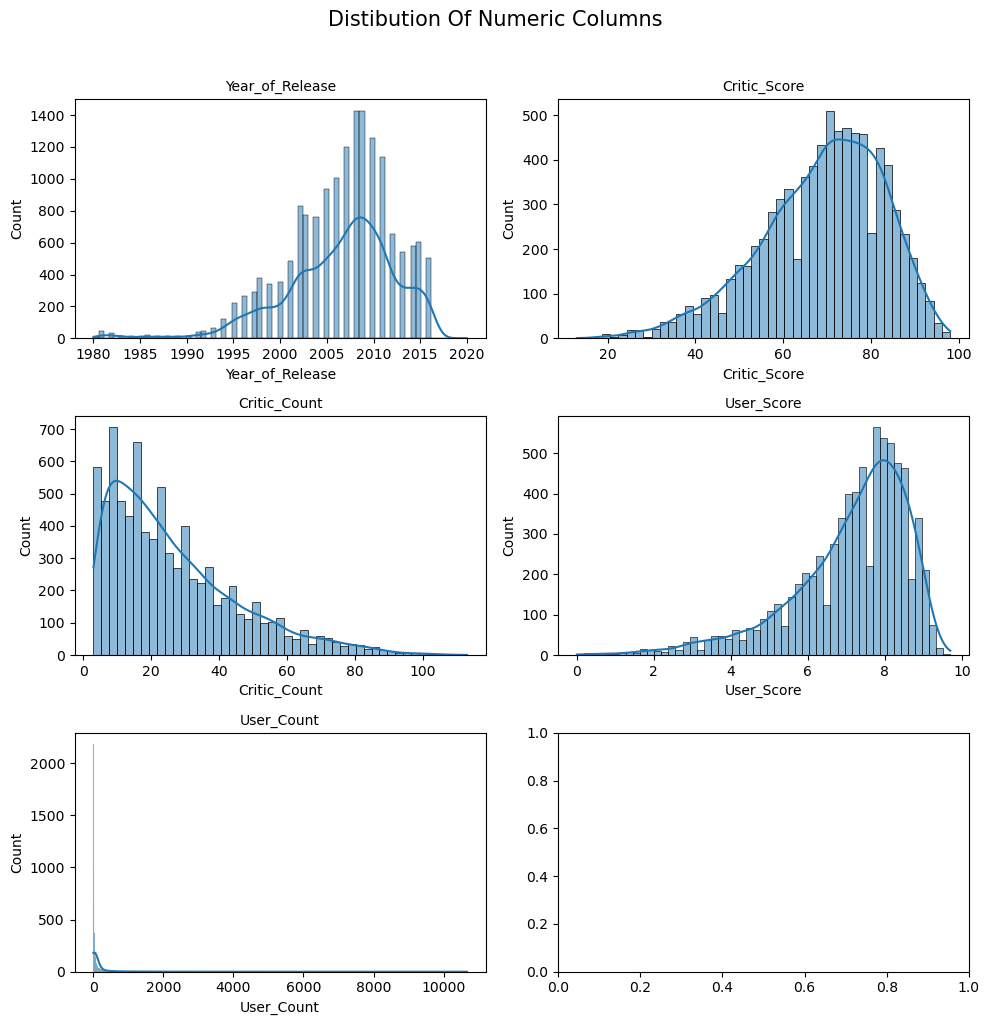

In [14]:
fig,axs = plt.subplots(3,2, figsize=(10,10))
axs = axs.flatten()
for i in range(5):
    sns.histplot(data = df, x = col2[i] , kde = True, ax = axs[i])
    axs[i].set_title(col2[i],fontsize = 10)
plt.suptitle("Distibution Of Numeric Columns",fontsize=15,y=1.02)
plt.tight_layout()
plt.show()

- The numeric columns are not equally distributed so missing values will be filled using the <b>Median</b> instead of the Mean to avoid being skewed by outliers
- Mean is sensitive to extreme values if filling values in a skewed data with mean those values might be higher or lower than the actual data so in this case filling with <b>Median</b> is the right choice
- for categorical column the best way is filling them with most frequent values <b>Mode</b>

In [15]:
# categorical filling
for i in col1:
    df[i] = df[i].fillna(df[i].mode()[0])
    
#numeric filling
for j in col2:
    df[j] = df[j].fillna(df[j].median())

In [16]:
print("\nMissing values in Each column after filling")
print("---------------------------------------------")
print(f"{df.isnull().sum()}\n")


Missing values in Each column after filling
---------------------------------------------
Name               0
Platform           0
Year_of_Release    0
Game_category      0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Age_Rating         0
dtype: int64



In [17]:
df["Year_of_Release"] = df["Year_of_Release"].astype(int) # fixing the notted issue of year column as float

In [18]:
df["Year_of_Release"].dtype

dtype('int64')

In [19]:
print(f"Number of Duplicate Values after Handling Null Values = {df.duplicated().sum()}")

Number of Duplicate Values after Handling Null Values = 0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  int64  
 3   Game_category    16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  float64
 11  Critic_Count     16719 non-null  float64
 12  User_Score       16719 non-null  float64
 13  User_Count       16719 non-null  float64
 14  Developer        16719 non-null  object 
 15  Age_Rating       16719 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 2.0+ MB


<span style = "border-bottom:1px solid green;font-size:25px">Outlier Detection & Removal</span><br>

- <b>Outliers</b> are extremely high or low values in the dataset. detecting and removing them helps keep the dataset clean and make the analysis more effective
- For Detecting Outliers <b>BoxPlot</b> is the most effective ways to visualize them. so in next step visuallize numerical columns to detect outliers in the dataset
- In this step i am going to use IQR method to filter out extremely high or low values from the dataset.

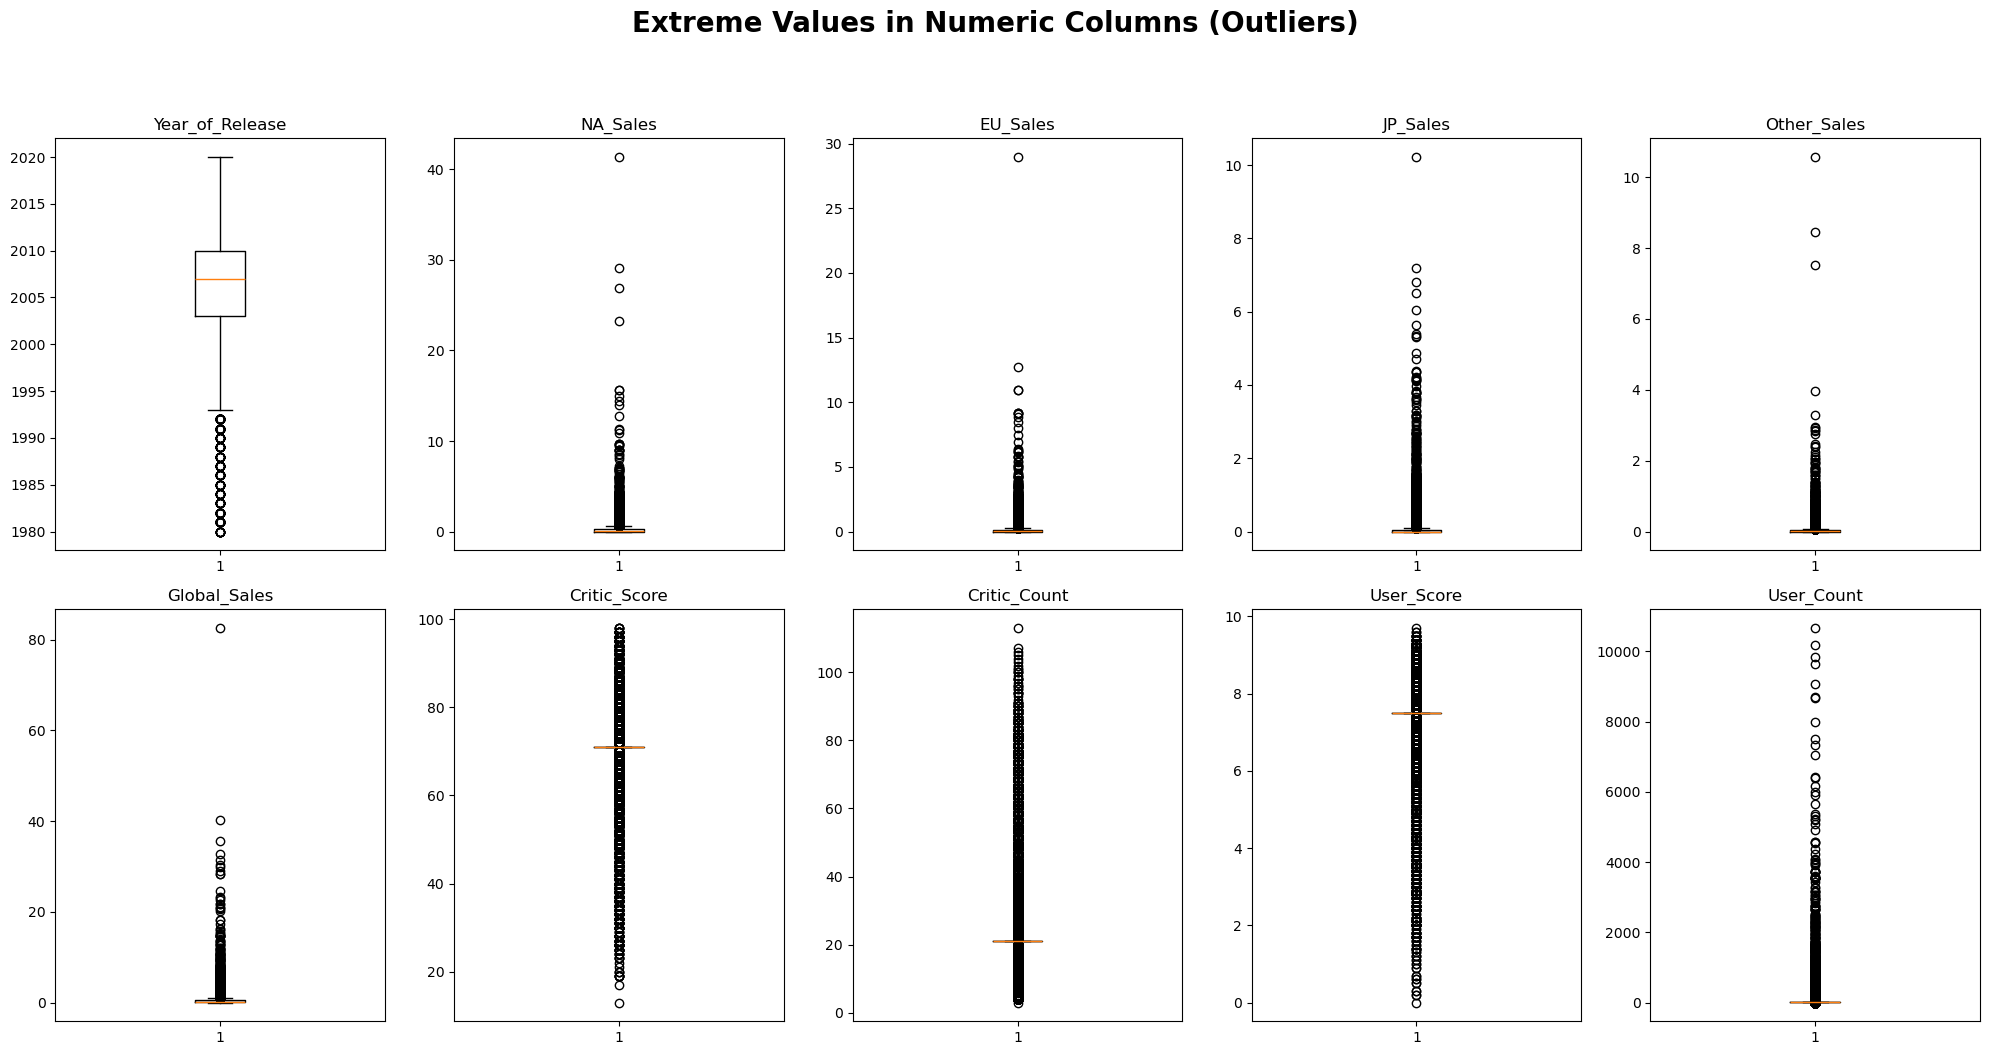

In [21]:
col3 = df.select_dtypes(["float","int"])

fig,axs = plt.subplots(2,5,figsize = (20,10))
axs = axs.flatten()

for i in range(10):
    axs[i].boxplot(df[col3.columns[i]])
    axs[i].set_title(col3.columns[i])
plt.suptitle("Extreme Values in Numeric Columns (Outliers)",fontsize=20,fontweight="bold",y=1.05)
plt.tight_layout()
plt.show()

- From this visualization each numeric column has outliers removing them can make dataset more cleaner and improve the overall data quality
- The next step i am going to filter the outliers using <b>IQR</b> method and remove them carefully.in this case i have 10 numeric columns<br> so i am going to define a function that can filter the outliers because i can reuse the function for each column without writing the IQR<br> method for each column<br>

#### <span style ="border-bottom:1px dotted">Defining a function to detect outliers</span>

In [22]:
def detect_outliers(df,col):
    
    Q1 = np.percentile(df[col],25,method = "midpoint")
    Q3 = np.percentile(df[col],75,method = "midpoint")

    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    outlier = df[(df[col] > upper) | (df[col] < lower)]
    outlier_list = outlier[col].tolist()

    return upper,lower,outlier,outlier_list

### <span style ="border-bottom:1px dotted">Outlier Removal</span><br>

#### <span style ="border-bottom:1px solid">column 1 : NA Sales</span>

In [23]:
upper_limit,lower_limit,outlier,outlier_list = detect_outliers(df,"NA_Sales")
print(f"upper_limit = {upper_limit}, lower_limit = {lower_limit}, outlier_list= {outlier_list}")
outlier.head()

upper_limit = 0.6, lower_limit = -0.36, outlier_list= [41.36, 29.08, 15.68, 15.61, 11.27, 23.2, 11.28, 13.96, 14.44, 26.93, 9.05, 9.71, 9.0, 8.92, 15.0, 9.01, 7.02, 9.43, 12.78, 4.74, 6.38, 10.83, 9.54, 9.66, 8.41, 6.06, 3.43, 5.51, 6.85, 9.04, 5.89, 6.03, 9.7, 5.28, 4.99, 8.25, 8.52, 5.54, 6.99, 6.62, 5.03, 5.99, 3.96, 2.5, 7.97, 6.91, 4.34, 4.35, 3.01, 6.06, 6.16, 6.76, 4.02, 4.89, 2.96, 4.99, 5.99, 4.76, 4.34, 5.01, 6.73, 5.95, 3.66, 5.55, 7.04, 3.01, 6.65, 3.88, 5.8, 4.1, 5.93, 4.36, 5.7, 2.03, 4.4, 5.05, 3.54, 1.12, 6.82, 1.75, 3.74, 1.06, 5.8, 2.79, 2.91, 0.99, 2.57, 2.99, 2.28, 7.28, 2.76, 2.9, 2.81, 4.1, 0.66, 3.78, 3.27, 3.56, 5.39, 4.59, 4.81, 4.46, 3.27, 3.48, 2.85, 2.53, 3.27, 3.74, 2.98, 3.68, 3.15, 4.41, 4.12, 2.71, 2.93, 3.23, 4.05, 4.15, 2.77, 3.45, 3.11, 3.27, 0.84, 1.66, 3.74, 2.79, 0.78, 2.64, 3.17, 4.98, 2.55, 2.57, 3.64, 2.55, 4.34, 3.7, 4.01, 2.47, 3.11, 4.05, 3.92, 3.54, 0.8, 2.45, 4.47, 3.18, 2.63, 1.88, 2.41, 2.8, 1.88, 0.63, 2.26, 2.49, 3.57, 3.07, 2.97, 2.95,

,Name,Platform,Year_of_Release,Game_category,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Age_Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,7.5,24.0,Ubisoft,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,7.5,24.0,Ubisoft,E


#### dropping outlier

In [24]:
df.drop(outlier.index , inplace = True)

In [25]:
outlier = df[(df["NA_Sales"] > upper_limit)|(df["NA_Sales"] < lower_limit)]["NA_Sales"].tolist()
outlier

[]

#### <span style ="border-bottom:1px solid">column 2 : EU Sales</span>

In [26]:
upper_limit,lower_limit,outlier,outlier_list = detect_outliers(df,"EU_Sales")
print(f"upper_limit = {upper_limit}, lower_limit = {lower_limit}, outlier_list= {outlier_list}")
outlier.head()

upper_limit = 0.17500000000000002, lower_limit = -0.10500000000000001, outlier_list= [6.21, 0.55, 2.39, 3.02, 2.26, 1.89, 2.48, 2.45, 2.36, 1.79, 2.28, 0.99, 0.21, 1.57, 1.58, 0.5, 1.02, 1.26, 1.24, 2.43, 2.79, 0.2, 0.29, 1.84, 1.39, 2.05, 1.79, 1.63, 0.27, 1.65, 1.5, 1.26, 1.17, 0.45, 1.27, 2.0, 1.25, 0.5, 1.19, 0.96, 1.42, 1.05, 1.02, 1.33, 0.45, 1.38, 0.41, 0.96, 1.28, 1.04, 1.27, 0.5, 0.64, 0.23, 1.23, 1.26, 0.26, 1.47, 1.37, 1.03, 0.89, 1.1, 0.98, 1.08, 0.86, 0.97, 1.01, 0.95, 0.9, 0.92, 1.06, 0.56, 0.81, 0.44, 0.68, 1.08, 0.98, 0.24, 0.87, 0.87, 1.12, 0.24, 0.87, 0.95, 0.9, 1.02, 0.21, 0.72, 0.88, 0.8, 0.81, 0.95, 0.76, 1.18, 0.96, 0.83, 1.58, 1.1, 0.69, 0.45, 0.18, 0.88, 0.43, 0.87, 0.8, 0.96, 0.87, 0.76, 0.66, 0.65, 0.63, 0.9, 1.16, 0.77, 1.16, 0.47, 0.62, 0.78, 1.1, 0.69, 0.69, 0.37, 0.5, 0.67, 0.88, 0.77, 0.91, 0.19, 0.69, 0.82, 0.47, 0.35, 1.08, 0.89, 0.75, 0.57, 1.13, 0.77, 0.37, 0.62, 0.69, 0.47, 0.5, 0.44, 0.65, 1.05, 0.78, 0.19, 0.18, 0.69, 0.53, 0.32, 0.18, 0.7, 0.41, 0

,Name,Platform,Year_of_Release,Game_category,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Age_Rating
138,World of Warcraft,PC,2004,Role-Playing,Activision,0.08,6.21,0.00,0.00,6.29,93.0,57.0,7.3,2182.0,Blizzard Entertainment,T
163,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.55,4.13,0.34,5.48,81.0,48.0,8.7,124.0,Capcom,T
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39,86.0,19.0,8.9,33.0,Konami,E
264,FIFA 15,PS3,2014,Sports,Electronic Arts,0.58,3.02,0.04,0.64,4.28,71.0,21.0,4.5,109.0,EA Sports,E
291,World Soccer Winning Eleven 9,PS2,2005,Sports,Konami Digital Entertainment,0.12,2.26,0.90,0.77,4.06,71.0,21.0,8.2,23.0,Konami,E


#### dropping outlier

In [27]:
df.drop(outlier.index, inplace = True)

In [28]:
outlier = df[(df["EU_Sales"] > upper_limit)|(df["EU_Sales"] < lower_limit)]["EU_Sales"].tolist()
outlier

[]

#### <span style ="border-bottom:1px solid">column 3 : JP Sales</span>

In [29]:
upper_limit,lower_limit,outlier,outlier_list = detect_outliers(df,"JP_Sales")
print(f"upper_limit = {upper_limit}, lower_limit = {lower_limit}, outlier_list= {outlier_list}")
outlier.head()

upper_limit = 0.075, lower_limit = -0.045, outlier_list= [4.87, 4.1, 3.77, 3.67, 0.64, 3.44, 3.18, 3.19, 3.03, 2.78, 2.68, 2.65, 2.41, 0.52, 0.26, 2.43, 2.34, 2.02, 2.29, 1.63, 2.05, 2.17, 1.56, 1.98, 2.13, 1.96, 1.29, 1.46, 1.48, 1.07, 1.49, 1.33, 1.49, 1.09, 1.35, 1.71, 1.69, 1.65, 1.27, 1.61, 1.36, 0.81, 1.56, 1.27, 1.52, 1.51, 1.5, 0.92, 1.3, 1.44, 1.45, 1.45, 1.44, 1.09, 1.39, 0.71, 1.3, 1.24, 1.39, 1.37, 1.0, 1.36, 1.26, 1.06, 1.07, 1.03, 1.33, 0.96, 1.29, 0.58, 0.85, 1.28, 1.1, 1.12, 1.25, 1.25, 0.75, 0.62, 0.7, 0.46, 1.0, 0.85, 1.14, 0.62, 1.2, 0.56, 1.2, 1.2, 1.2, 1.08, 0.52, 0.42, 1.17, 0.83, 0.77, 0.5, 1.15, 1.15, 0.46, 1.15, 1.07, 0.65, 0.48, 0.76, 0.88, 1.06, 0.84, 0.63, 0.7, 1.1, 0.73, 1.1, 1.1, 1.1, 0.45, 1.1, 0.72, 0.84, 1.07, 1.02, 1.0, 0.77, 0.71, 0.99, 0.92, 1.05, 1.04, 1.05, 0.66, 0.83, 0.45, 0.37, 0.85, 0.51, 0.49, 0.37, 1.01, 0.74, 0.47, 1.0, 0.74, 0.41, 0.64, 0.86, 0.97, 0.96, 0.9, 0.57, 0.96, 0.53, 0.63, 0.46, 0.71, 0.63, 0.36, 0.47, 0.42, 0.32, 0.27, 0.93, 0.39

,Name,Platform,Year_of_Release,Game_category,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Age_Rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87,71.0,21.0,7.5,24.0,Ubisoft,E
244,Dragon Quest VII: Warriors of Eden,PS,2000,Role-Playing,Enix Corporation,0.20,0.14,4.10,0.02,4.47,71.0,21.0,7.5,24.0,Ubisoft,E
316,Dragon Warrior III,NES,1988,Role-Playing,Enix Corporation,0.10,0.00,3.77,0.00,3.87,71.0,21.0,7.5,24.0,Ubisoft,E
340,Friend Collection,DS,2009,Misc,Nintendo,0.00,0.00,3.67,0.00,3.67,71.0,21.0,7.5,24.0,Ubisoft,E
349,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63,82.0,10.0,7.9,38.0,Konami,E


#### dropping outlier

In [30]:
df.drop(outlier.index , inplace  = True)

In [31]:
outlier = df[(df["JP_Sales"] > upper_limit)|(df["JP_Sales"] < lower_limit)]["JP_Sales"].tolist()
outlier

[]

#### <span style ="border-bottom:1px solid">column 4 : Other Sales</span>

In [32]:
upper_limit,lower_limit,outlier,outlier_list = detect_outliers(df,"Other_Sales")
print(f"upper_limit = {upper_limit}, lower_limit = {lower_limit}, outlier_list= {outlier_list}")
outlier.head()

upper_limit = 0.05, lower_limit = -0.03, outlier_list= [1.82, 1.33, 1.13, 0.93, 0.76, 1.09, 1.18, 1.02, 0.75, 0.66, 0.54, 0.5, 0.53, 0.74, 0.07, 0.07, 0.61, 0.14, 0.06, 0.36, 0.09, 0.54, 0.13, 0.09, 0.06, 0.1, 0.1, 0.1, 0.1, 0.14, 0.06, 0.07, 0.07, 0.09, 0.07, 0.06, 0.06, 0.08, 0.09, 0.07, 0.09, 0.09, 0.06, 0.06, 0.08, 0.41, 0.1, 0.09, 0.6, 0.15, 0.44, 0.06, 0.09, 0.08, 0.09, 0.44, 0.09, 0.09, 0.11, 0.11, 0.06, 0.57, 0.14, 0.08, 0.08, 0.06, 0.08, 0.08, 0.06, 0.07, 0.07, 0.1, 0.08, 0.07, 0.08, 0.33, 0.06, 0.08, 0.07, 0.08, 0.07, 0.07, 0.06, 0.07, 0.08, 0.19, 0.48, 0.09, 0.07, 0.07, 0.07, 0.07, 0.08, 0.07, 0.39, 0.1, 0.06, 0.08, 0.07, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.33, 0.22, 0.07, 0.1, 0.07, 0.07, 0.24, 0.06, 0.07, 0.17, 0.06, 0.09, 0.06, 0.06, 0.07, 0.06, 0.06, 0.06, 0.06, 0.09, 0.09, 0.06, 0.06, 0.06, 0.06, 0.07, 0.06, 0.2, 0.39, 0.34, 0.07, 0.06, 0.08, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.08, 0.06, 0.38, 0.06, 0.06, 0.06, 0.26, 0.06, 0.06, 0

,Name,Platform,Year_of_Release,Game_category,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Age_Rating
699,FIFA Soccer 09,PS2,2008,Sports,Electronic Arts,0.38,0.07,0.01,1.82,2.28,82.0,8.0,6.9,20.0,EA Canada,E
924,High School Musical: Sing It!,PS2,2007,Misc,Disney Interactive Studios,0.47,0.08,0.00,1.33,1.87,71.0,21.0,7.5,24.0,Ubisoft,E
1249,The Simpsons Game,PS2,2007,Action,Electronic Arts,0.35,0.03,0.00,1.13,1.51,68.0,10.0,8.2,27.0,Electronic Arts,T
1378,Need For Speed: Undercover,PS2,2008,Racing,Electronic Arts,0.38,0.08,0.03,0.93,1.40,71.0,21.0,6.5,38.0,Exient Entertainment,T
1408,LEGO Indiana Jones: The Original Adventures,PS2,2008,Action,LucasArts,0.60,0.01,0.00,0.76,1.37,77.0,12.0,8.4,16.0,Traveller's Tales,E10+


#### dropping outlier

In [33]:
df.drop(outlier.index, inplace = True)

In [34]:
outlier = df[(df["Other_Sales"] > upper_limit)|(df["Other_Sales"] < lower_limit)]["Other_Sales"].tolist()
outlier

[]

#### <span style ="border-bottom:1px solid">column 5 : Critic Score</span>

In [35]:
upper_limit,lower_limit,outlier,outlier_list = detect_outliers(df,"Critic_Score")
print(f"upper_limit = {upper_limit}, lower_limit = {lower_limit}, outlier_list= {outlier_list}")
outlier.head()

upper_limit = 75.5, lower_limit = 63.5, outlier_list= [80.0, 83.0, 76.0, 80.0, 84.0, 48.0, 77.0, 89.0, 58.0, 90.0, 86.0, 89.0, 77.0, 84.0, 85.0, 84.0, 78.0, 63.0, 81.0, 62.0, 63.0, 83.0, 83.0, 77.0, 88.0, 89.0, 84.0, 79.0, 78.0, 57.0, 81.0, 91.0, 32.0, 62.0, 82.0, 89.0, 88.0, 80.0, 82.0, 56.0, 86.0, 49.0, 46.0, 76.0, 62.0, 89.0, 84.0, 59.0, 86.0, 88.0, 90.0, 80.0, 90.0, 62.0, 77.0, 33.0, 81.0, 90.0, 89.0, 84.0, 91.0, 90.0, 85.0, 63.0, 60.0, 86.0, 87.0, 91.0, 60.0, 63.0, 87.0, 77.0, 77.0, 81.0, 80.0, 80.0, 47.0, 81.0, 58.0, 88.0, 83.0, 47.0, 81.0, 63.0, 79.0, 80.0, 82.0, 84.0, 81.0, 87.0, 55.0, 81.0, 88.0, 46.0, 85.0, 78.0, 82.0, 81.0, 47.0, 60.0, 82.0, 77.0, 41.0, 79.0, 90.0, 56.0, 76.0, 79.0, 52.0, 90.0, 78.0, 59.0, 94.0, 76.0, 85.0, 56.0, 62.0, 56.0, 82.0, 56.0, 47.0, 88.0, 81.0, 86.0, 62.0, 60.0, 63.0, 59.0, 89.0, 80.0, 82.0, 84.0, 81.0, 61.0, 55.0, 57.0, 81.0, 58.0, 59.0, 57.0, 49.0, 61.0, 85.0, 78.0, 76.0, 61.0, 56.0, 43.0, 58.0, 62.0, 78.0, 55.0, 80.0, 80.0, 82.0, 80.0, 50.0, 81.

,Name,Platform,Year_of_Release,Game_category,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Age_Rating
2635,James Bond 007: Nightfire,GC,2002,Shooter,Electronic Arts,0.60,0.16,0.00,0.02,0.78,80.0,17.0,8.6,46.0,Eurocom Entertainment Software,T
2772,Unreal Championship,XB,2002,Shooter,Atari,0.59,0.12,0.00,0.03,0.74,83.0,29.0,8.2,24.0,Digital Extremes,M
2794,Harvest Moon: Animal Parade,Wii,2008,Simulation,Rising Star Games,0.58,0.08,0.02,0.05,0.73,76.0,10.0,8.9,20.0,Natsume,E
2803,Oddworld: Munch's Oddysee,XB,2001,Platform,Atari,0.54,0.16,0.00,0.03,0.73,80.0,30.0,8.7,32.0,Oddworld Inhabitants,T
2810,Full Spectrum Warrior,XB,2004,Strategy,THQ,0.54,0.16,0.00,0.03,0.73,84.0,67.0,8.7,27.0,Pandemic Studios,M


#### dropping outlier

In [36]:
df.drop(outlier.index , inplace = True)

In [37]:
outlier = df[(df["Critic_Score"] > upper_limit)|(df["Critic_Score"] < lower_limit)]["Critic_Score"].tolist()
outlier

[]

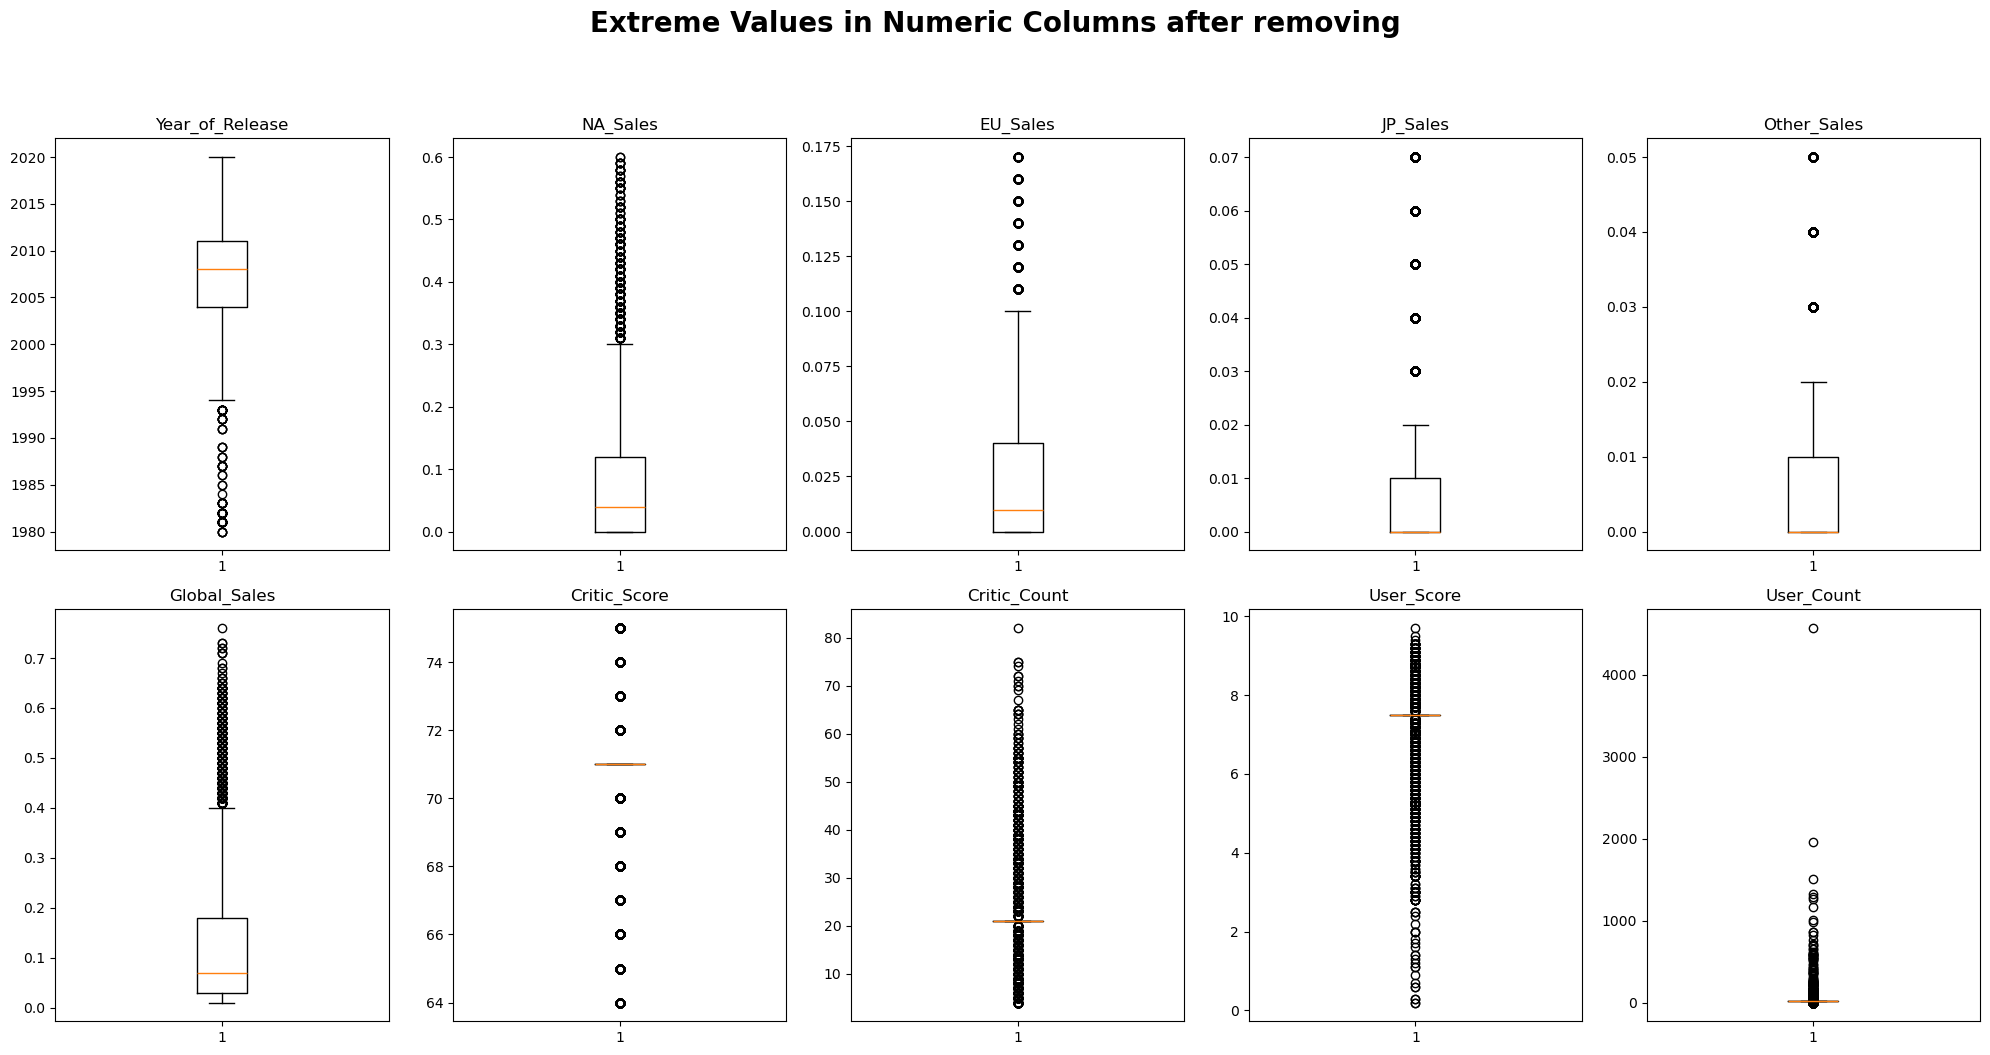

In [38]:
col4 = df.select_dtypes(["float", "int"])

fig,axs = plt.subplots(2,5,figsize = (20,10))
axs = axs.flatten()

for i in range(10):
    axs[i].boxplot(df[col4.columns[i]])
    axs[i].set_title(col4.columns[i])
plt.suptitle("Extreme Values in Numeric Columns after removing",fontsize=20,fontweight="bold",y=1.05)
plt.tight_layout()
plt.show()

In [39]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000
mean,2007.104468,0.080491,0.026477,0.009830,0.008043,0.125286,70.666265,21.175762,7.394984,29.504682
std,5.687532,0.107397,0.039088,0.018217,0.011474,0.130687,1.745336,6.698865,0.741864,81.009891
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,64.000000,4.000000,0.200000,4.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.030000,71.000000,21.000000,7.500000,24.000000
50%,2008.000000,0.040000,0.010000,0.000000,0.000000,0.070000,71.000000,21.000000,7.500000,24.000000
75%,2011.000000,0.120000,0.040000,0.010000,0.010000,0.180000,71.000000,21.000000,7.500000,24.000000
max,2020.000000,0.600000,0.170000,0.070000,0.050000,0.760000,75.000000,82.000000,9.700000,4572.000000


In [40]:
df.shape

(7476, 16)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7476 entries, 2690 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             7476 non-null   object 
 1   Platform         7476 non-null   object 
 2   Year_of_Release  7476 non-null   int64  
 3   Game_category    7476 non-null   object 
 4   Publisher        7476 non-null   object 
 5   NA_Sales         7476 non-null   float64
 6   EU_Sales         7476 non-null   float64
 7   JP_Sales         7476 non-null   float64
 8   Other_Sales      7476 non-null   float64
 9   Global_Sales     7476 non-null   float64
 10  Critic_Score     7476 non-null   float64
 11  Critic_Count     7476 non-null   float64
 12  User_Score       7476 non-null   float64
 13  User_Count       7476 non-null   float64
 14  Developer        7476 non-null   object 
 15  Age_Rating       7476 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 992.9+ KB


<div style="text-align:center">
    <span style = "border-bottom:1px solid; font-size:20px;">Observation & Conclusion</span>
</div><br>
<span style = "font-size:15px">While performing outlier detection & removal, I plotted boxplots for all numeric columns and found that
All numeric columns had outliers. To filter and remove outliers, I used the <b>IQR</b> method and found that the outliers were actually real world values. For experimenting, I removed outliers from all 10 numeric columns, which caused a massive data loss from <b>16719</b> rows to <b>5019</b> rows. Since this is an EDA focused project, I need to perform the outlier detection and removal, so i selected few columns instead of removing all to prevent more data loss</span><br>

#### <span style ="border-bottom:1px solid">Selected columns are</span>

<ol>
    <li>NA Sales</li>
    <li>EU Sales</li>
    <li>JP Sales</li>
    <li>Other Sales</li>
    <li>Critic Score</li>
</ol>

- I also plotted the before and after boxplots to show the effect of the outlier removal step<br><br>
- I dropped some rows during outlier removal so the index numbers were no longer in order.<br>to keep the dataset clean and avoid any confusion i need to reset the index numbers

In [42]:
df.reset_index(drop = True, inplace = True) 

<span style = "border-bottom:1px solid green;font-size:25px">Bivariate Analysis</span><br>

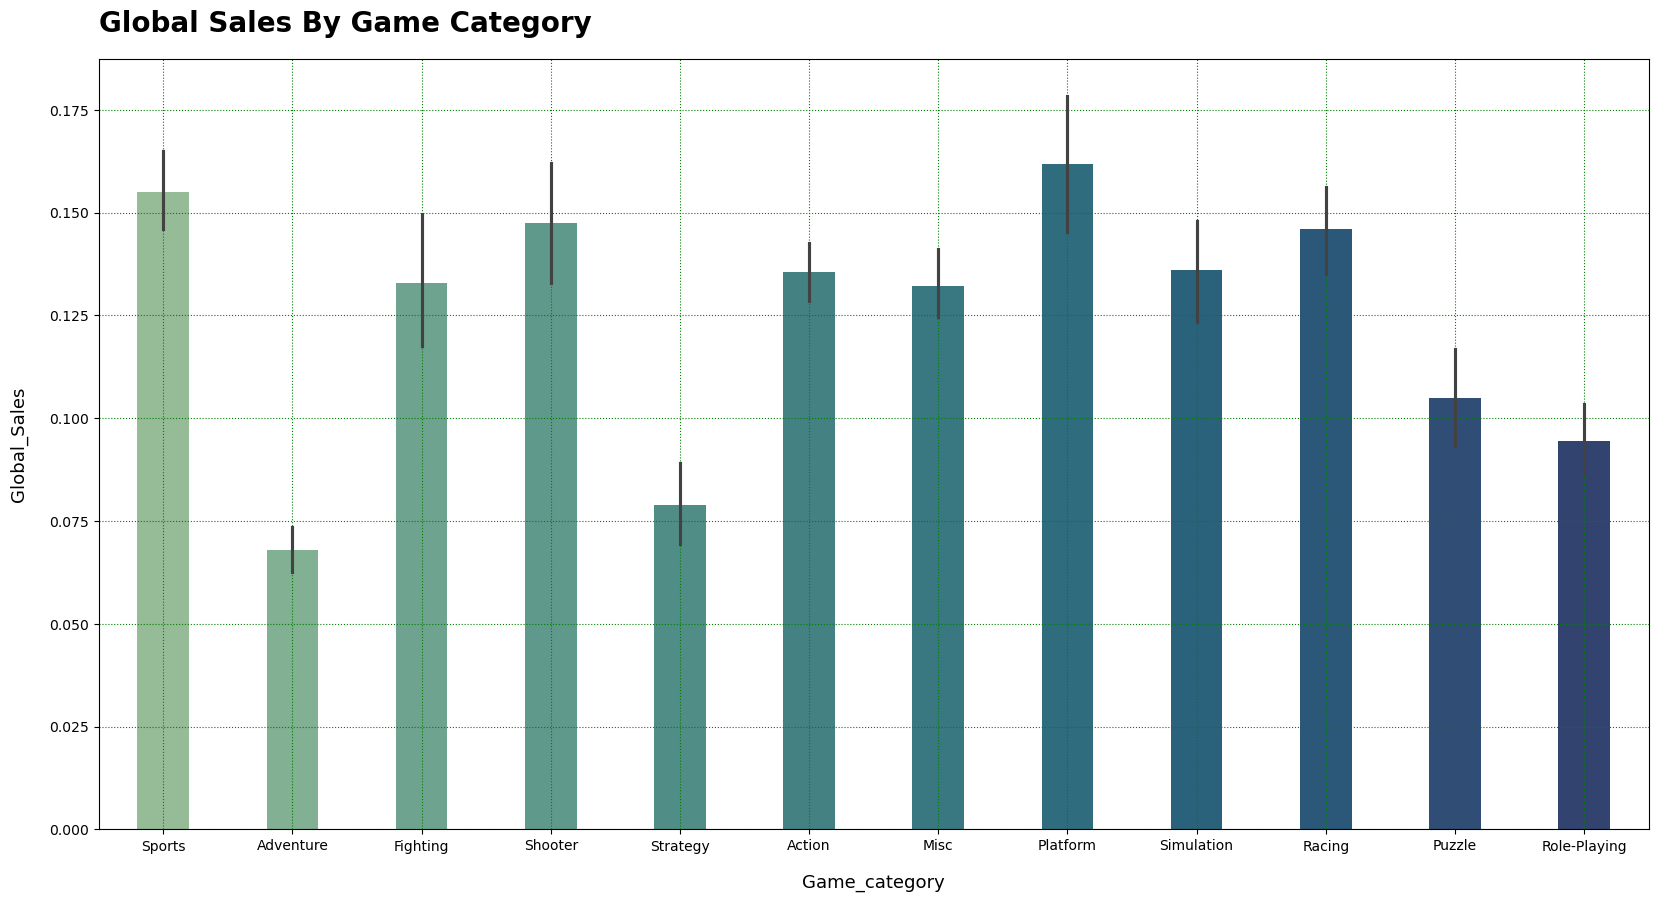

In [43]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Game_category" , y = "Global_Sales",data = df,palette = "crest",width = 0.4)
plt.title("Global Sales By Game Category", fontsize = 20, fontweight ="bold",pad = 20,loc = "left")
plt.xlabel("Game_category",fontsize = 13,labelpad= 15)
plt.ylabel("Global_Sales",fontsize = 13,labelpad=15)
plt.grid(linestyle = ":", color = "green")
plt.show()

This bar chart compares global sales across different game categories. From this analysis <b>platform</b>, games have the highest global sales among all categories. Sports shooter action and racing games also have a strong sales performance.<br>
categories like adventure, strategy, and roleplaying games have lower global sales  From this chart we can see that they are less popular in the global market 

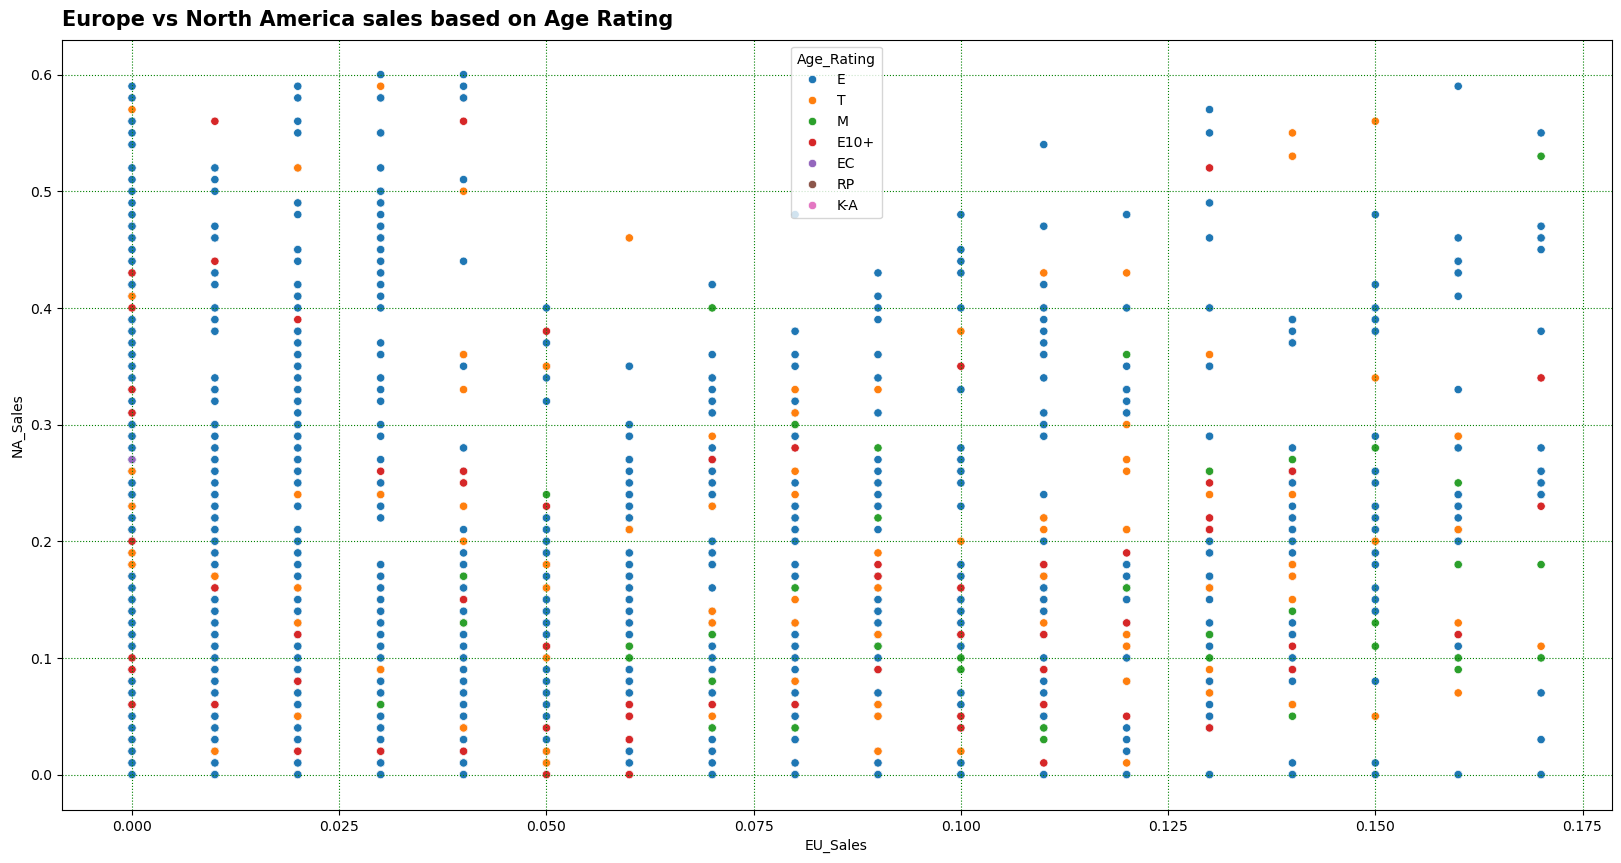

In [44]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = df, x = "EU_Sales", y = "NA_Sales",hue ="Age_Rating")
plt.title("Europe vs North America sales based on Age Rating",fontsize = 15, pad = 10,fontweight = "bold",loc = "left")
plt.grid(linestyle = ":",color = "green")
plt.show()

#### <span style = "border-bottom:1px solid">Age Rating</span>
<ul>
    <li>E -> Everyone</li>
    <li>T -> Teen</li>
    <li>M -> Mature</li>
    <li>E10+ -> Everyone 10 and older</li>
    <li>EC -> Early Childhood</li>
    <li>RP -> Rating Pending</li>
    <li>KA -> Kids To Adults</li>
</ul>

- From this analysis of Europe sales vs North America sales, the majority of points are colored in the category of Everyone (E).<br>That shows most of the games sold in both Europe (EU) and North America (NA) are designed for all age groups.<br> so we can clearly see that both European and North American markets strongly prefer Family friendly games making the (E) rated games are higher selling categories across these two regions<br>

After completing outlier removal and bivariate analysis the essential step in Eda is <b>Encoding</b> the categorical variable and <b>Scaling</b> the numerical columns to ensuring the data is properly prepared for mechine learning model training<br>

## <span style ="border-bottom:1px solid">Encoding categorical variables</span>
Encoding refers to the process of converting categorical data in to numerical format so ML model can understand and process it.<br>

- i am going to performe Encoding and Scaling on a copied version of the dataset where i  already handled null values and removed outliers so my cleaned data will not lose any original columns or values.

In [45]:
df1 = df.copy() # copied version of the cleaned data

In [46]:
col4 = df1.select_dtypes("object")
col4.nunique() # used for checking how many unique values are present in the selected columns

Name             6142
Platform           31
Game_category      12
Publisher         494
Developer        1026
Age_Rating          7
dtype: int64

- name column contain too many unique values. encoding such column would create a lot of unnecessary values so droping them is the best choice

In [47]:
df1.drop("Name",axis = 1, inplace = True)

In [48]:
le = LabelEncoder()

col5 = df1.select_dtypes("object")

for i in col5.columns:
    df1[i] = le.fit_transform(df1[i])

In [49]:
df1.head()

,Platform,Year_of_Release,Game_category,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Age_Rating
0,10,2001,10,19,0.59,0.16,0.0,0.01,0.76,71.0,21.0,7.5,24.0,925,0
1,28,2012,1,52,0.55,0.13,0.0,0.05,0.73,71.0,21.0,7.5,24.0,925,0
2,10,1998,2,166,0.55,0.17,0.0,0.01,0.73,71.0,21.0,7.5,24.0,925,0
3,7,2002,8,129,0.56,0.15,0.0,0.02,0.72,74.0,16.0,6.8,25.0,297,6
4,29,2002,8,129,0.53,0.17,0.0,0.03,0.72,73.0,39.0,8.9,16.0,605,4


In [50]:
df1.describe()

,Platform,Year_of_Release,Game_category,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Age_Rating
count,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.00000,7476.000000
mean,15.088149,2007.104468,4.629615,252.009898,0.080491,0.026477,0.009830,0.008043,0.125286,70.666265,21.175762,7.394984,29.504682,734.20947,0.947967
std,8.649805,5.687532,3.729578,156.175670,0.107397,0.039088,0.018217,0.011474,0.130687,1.745336,6.698865,0.741864,81.009891,291.82985,2.025350
min,0.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,64.000000,4.000000,0.200000,4.000000,0.00000,0.000000
25%,6.000000,2004.000000,1.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.030000,71.000000,21.000000,7.500000,24.000000,548.00000,0.000000
50%,16.000000,2008.000000,4.000000,263.000000,0.040000,0.010000,0.000000,0.000000,0.070000,71.000000,21.000000,7.500000,24.000000,925.00000,0.000000
75%,20.000000,2011.000000,8.000000,407.000000,0.120000,0.040000,0.010000,0.010000,0.180000,71.000000,21.000000,7.500000,24.000000,925.00000,0.000000
max,30.000000,2020.000000,11.000000,493.000000,0.600000,0.170000,0.070000,0.050000,0.760000,75.000000,82.000000,9.700000,4572.000000,1025.00000,6.000000


I used LabelEncoding because this method avoids creating too many new columns and helps keep the dataset clean now the data set become fully numeric

## <span style ="border-bottom:1px solid">Feature Scaling</span>
Scaling refers to process of adjusting the range of feature values so they fit in a specific range <br>
it improves the perfomence of ml model and many ml model need scaled data so they treate each features equally<br><br>
In this step i am using <b>Min Max</b> scaler for range based scaling it will scale the features between 0 and 1<br>
I chose min max scaler because it keeps original distribution of the data and only rescale the values between 0 and 1<br><br>

When performing scaling i need to avoid the encoded columns and the target column because the target column represents the outcome we want to predict and should remain unchanged and the encoded column represents the labels not numeric quantities scaling them can disort their meaning

In [54]:
mm = MinMaxScaler()

col6 = ["Year_of_Release","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Critic_Score","Critic_Count",
        "User_Score","User_Count"]

df1[col6] = mm.fit_transform(df1[col6])

In [55]:
df1.describe()

,Platform,Year_of_Release,Game_category,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Age_Rating
count,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.000000,7476.00000,7476.000000
mean,15.088149,0.677612,4.629615,252.009898,0.134152,0.155745,0.140430,0.160861,0.125286,0.606024,0.220202,0.757367,0.005583,734.20947,0.947967
std,8.649805,0.142188,3.729578,156.175670,0.178995,0.229931,0.260245,0.229476,0.130687,0.158667,0.085883,0.078091,0.017734,291.82985,2.025350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.000000,0.600000,1.000000,111.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.636364,0.217949,0.768421,0.004378,548.00000,0.000000
50%,16.000000,0.700000,4.000000,263.000000,0.066667,0.058824,0.000000,0.000000,0.070000,0.636364,0.217949,0.768421,0.004378,925.00000,0.000000
75%,20.000000,0.775000,8.000000,407.000000,0.200000,0.235294,0.142857,0.200000,0.180000,0.636364,0.217949,0.768421,0.004378,925.00000,0.000000
max,30.000000,1.000000,11.000000,493.000000,1.000000,1.000000,1.000000,1.000000,0.760000,1.000000,1.000000,1.000000,1.000000,1025.00000,6.000000


I chose target column as Global Sales because it represents the total sales value of each game.by analysing it we can find which game is most selling world wide. which platforms are most poppular globaly and how regional sales is effecting most of the global sales. global sales provides valuable insights. which is why it was chosen as the target column 

<div style= "text-align:center">
    <span style = "font-size:25px;border-bottom:2px solid green"><b>Conclusion</b></span><br>
</div>

In this EDA project the dataset was explored to understand patterns and insights in video game sales.the dataset contains 16719 rows and 16 columns at the begining. 7 object columns and 9 numerical columns. during exploration missing values spotted in 10 columns and 2 columns datatype were missplaced that actual data.numeric column distributions were assymetric. after the spotted issues and halded null values the data set column datatype were changed and get 10 numeric columns and 6 object columns.in 10 numeric columns were containing outliers. the outliers were actual real world values for expirimenting purpose first removed outliers from 10 numeric columns and the data set rows dropped aggresively and the data set rows drom from 16719 rows to 5019 rows so selecting few columns was the better option in outlier detection and removal.the barchart and scatter plot gave meaning full insights and popular game platforms and which age category game where mostly sold in selected regions.finally prepared the dataset for ml modeling and the feature scaling was appliedto normalise the selected numerical features . overall the analysis highlights key patterns and provides a clean scaled data set